
# Model evaluation - Precision Case

---

# **Introduction**
---

- **Model Evaluation** is an **integral part of the model development process**.

- It **helps to find** **the best model that represents our data** and how well the chosen model will work in the future. 

- Evaluating model performance with the data used for training should not be used in data science because the model has already learned the features passed for training and when evaluated on the same data it will pass overfitted result.


### **Need for Model Evaluation.**

- Model Evaluation **plays an important role** in the whole process.

- The performance of a model is **calculated by choosing the right metrics**.

- The **right metrics** are generally **specific to the use case**.

- It also helps us choose the right model.

---
<a name = Section1></a>
# **2. Problem Statement**
---
- Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". 

- Given the dataset containing __personal details of citizens__.

- A few of them have been arrested for various small and large crimes in the past.

- Make a model to predict whether people will commit crime in future or not using random forest algorithm.  



- Evaluate the model using possible __model evaluation techniques__. 

---

# **Installing & Importing Libraries**
---


### **Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\kommurir\anaconda3\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\kommurir\anaconda3\python.exe -m pip install --upgrade pip' command.


<a name = Section32></a>
### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling

You should consider upgrading via the 'c:\users\kommurir\anaconda3\python.exe -m pip install --upgrade pip' command.


<a name = Section33></a>
### **Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---

# **Data Acquisition & Description**
---

In [7]:
crime = pd.read_csv('https://raw.githubusercontent.com/KommuriRaju/Machine-Learning-Projects/main/Logistic%20Regression/Crime_Data_For_Model_Evaluation_Precision.csv')
crime.head()

,Unnamed: 0,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1,0
1,1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2,1
2,2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1,0
3,3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1,0
4,4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2,0


In [8]:
crime.shape

(45718, 73)


### **Data Information**

- In this section we will see the **information about the types of features**.


- The dataset consists of __45718 rows__.<br/>
Below is a table having brief description of features present in the dataset.



|Feature    |	Description                                               |
|-----------| ------------                                                | 
|PERID	    |        Person ID                                            |
| IFATHER   | 	FATHER IN HOUSEHOLD                                       |
| NRCH17_2  | 	RECODED # R's CHILDREN &lt; 18 IN HOUSEHOLD               |
| RHHSIZ2	| RECODE - IMPUTATION-REVISED # PERSONS IN HH                 |
| IIHHSIZ2	| IMPUTATION INDICATOR                                        |
| IRKI17_2	| IMPUTATION-REVISED # KIDS AGED&lt;18 IN HH                  |   
| IIKI17_2  |  IRKI17_2-IMPUTATION INDICATOR                              | 
| IRHH65_2  | 	REC - IMPUTATION-REVISED # OF PER IN HH AGED&gt;=65       |
| IIHH65_2  | 	IRHH65_2-IMPUTATION INDICATOR                             |
| PRXRETRY	| SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?          | 
| PRXYDATA	| IS PROXY ANSWERING INSURANCE/INCOME QS                      |
| MEDICARE	| COVERED BY MEDICARE                                         |
| CAIDCHIP	| COVERED BY MEDICAID/CHIP                                    |
| CHAMPUS	| COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY              |
| PRVHLTIN	| COVERED BY PRIVATE INSURANCE                                |
| GRPHLTIN	| PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION              |
| HLTINNOS	| COVERED BY HEALTH INSUR                                     |
| HLCNOTYR  | ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS           |
| HLCNOTMO  | 	PAST 12 MOS, HOW MANY MOS W/O COVERAGE                    |
| HLCLAST	| TIME SINCE LAST HAD HEALTH CARE COVERAGE                    |
| HLLOSRSN	| MAIN REASON STOPPED COVERED BY HEALTH INSURANCE             |
| HLNVCOST  | 	COST TOO HIGH                                             |
| HLNVOFFR	| EMPLOYER DOESN'T OFFER                                      |
| HLNVREF	| INSURANCE COMPANY REFUSED COVERAGE                          |
| HLNVNEED  | 	DON'T NEED IT                                             |
| HLNVSOR   | 	NEVER HAD HLTH INS SOME OTHER REASON                      |
| IRMCDCHP  | 	IMPUTATION REVISED CAIDCHIP                               |
| IIMCDCHP	| MEDICAID/CHIP - IMPUTATION INDICATOR                        |
| IRMEDICR	| MEDICARE - IMPUTATION REVISED                               |
| IIMEDICR	| MEDICARE - IMPUTATION INDICATOR                             |
| IRCHMPUS	| CHAMPUS - IMPUTATION REVISED                                |
| IICHMPUS	| CHAMPUS - IMPUTATION INDICATOR                              |
| IRPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION REVISED               |
| IIPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR             |
| IROTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION REVISED                 |
| IIOTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION INDICATOR               |
| HLCALLFG	| FLAG IF EVERY FORM OF HEALTH INS REPORTED                   |
| HLCALL99	| YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN                   |
| ANYHLTI2	| COVERED BY ANY HEALTH INSURANCE - RECODE                    |
| IRINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED            |
| IIINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR          |
| OTHINS	| RC-OTHER HEALTH INSURANCE                                   |
| CELLNOTCL	| NOT A CELL PHONE                                            |
| CELLWRKNG | WORKING CELL PHONE                                          |
| IRFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED          |
| IIFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR        |
| IRFAMSSI	| FAM RECEIVE SSI - IMPUTATION REVISED                        |
| IIFAMSSI	| FAM RECEIVE SSI - IMPUTATION INDICATOR                      |
| IRFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED       |
| IIFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR     |
| IRFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED              |
| IIFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR            |
| IRFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED       |
| IIFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR     |
| IRWELMOS	| IMP. REVISED - NO.OF MONTHS ON WELFARE                      |
| IIWELMOS	| NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR              |
| IRPINC3	| RESP TOT INCOME (FINER CAT) - IMP REV                       |
| IRFAMIN3  | RECODE - IMP.REVISED - TOT FAM INCOME                       |
| IIPINC3	| RESP TOT INCOME (FINER CAT) - IMP INDIC                     |
| IIFAMIN3	| IRFAMIN3 - IMPUTATION INDICATOR                             |
| GOVTPROG  | RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS         |
| POVERTY3	| RC-POVERTY LEVEL                                            |
| TOOLONG	| RESP SAID INTERVIEW WAS TOO LONG                            |
| TROUBUND	| DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW               |
| PDEN10	| POPULATION DENSITY 2010                                     |
| COUTYP2	| COUNTY METRO/NONMETRO STATUS                                |
| MAIIN102	| MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT             |
| AIIND102	| AMER INDIAN AREA INDICATOR                                  |
| ANALWT_C	| FIN PRSN-LEVEL SIMPLE WGHT                                  |
| VESTR    	| ANALYSIS STRATUM                                            |
| VEREP	    | ANALYSIS REPLICATE                                          |
| Criminal	| Target Variable                                             |

In [9]:
print("Shape of our Data is :", crime.shape)
print("Number of Rows are :",crime.shape[0])
print("Number of Columns are :",crime.shape[1])

Shape of our Data is : (45718, 73)
Number of Rows are : 45718
Number of Columns are : 73


In [10]:
crime.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45718 non-null  int64  
 1   PERID       45718 non-null  int64  
 2   IFATHER     45718 non-null  int64  
 3   NRCH17_2    45718 non-null  int64  
 4   IRHHSIZ2    45718 non-null  int64  
 5   IIHHSIZ2    45718 non-null  int64  
 6   IRKI17_2    45718 non-null  int64  
 7   IIKI17_2    45718 non-null  int64  
 8   IRHH65_2    45718 non-null  int64  
 9   IIHH65_2    45718 non-null  int64  
 10  PRXRETRY    45718 non-null  int64  
 11  PRXYDATA    45718 non-null  int64  
 12  MEDICARE    45718 non-null  int64  
 13  CAIDCHIP    45718 non-null  int64  
 14  CHAMPUS     45718 non-null  int64  
 15  PRVHLTIN    45718 non-null  int64  
 16  GRPHLTIN    45718 non-null  int64  
 17  HLTINNOS    45718 non-null  int64  
 18  HLCNOTYR    45718 non-null  int64  
 19  HLCNOTMO    45718 non-nul

**Observations:**

- There are **no null values present**.

- **Each feature** seems to have **correct data type**.


### **Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [11]:
crime.describe()

,Unnamed: 0,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000
mean,22858.50000,54454463.79260,3.35555,0.47649,3.42637,1.00171,2.08412,1.00744,1.16261,1.01102,97.39494,70.87410,2.37145,2.65208,2.22448,2.04320,39.55208,86.07395,12.84781,92.27289,89.32335,91.31819,97.10243,97.13688,97.14880,97.13207,97.13721,1.77247,1.01907,1.91673,1.00971,1.96179,1.00556,1.38746,1.01400,85.76016,7.88105,97.97657,97.97657,1.97150,1.10392,1.01846,1.85505,1.74117,1.14482,1.83794,1.01877,1.93160,1.01890,1.80003,1.00993,1.97321,1.01479,1.96384,1.01124,94.12689,8.52474,2.58465,4.75047,1.06142,1.19402,1.76268,2.33814,2.21941,2.23494,1.64614,1.76467,1.97894,1.97874,4692.66118,40023.73912,1.49385,0.06945
std,13197.79414,25539107.56901,1.17665,0.88847,1.42742,0.06131,1.10299,0.12316,0.46903,0.14644,12.35516,44.32568,6.48992,8.94829,4.94478,7.80935,47.78638,33.00842,30.64631,24.25711,28.85306,25.80548,13.29394,13.04907,12.96324,13.08355,13.04672,0.41955,0.19528,0.27677,0.14028,0.19239,0.10692,0.48745,0.16779,33.34899,2.75487,1.51013,1.51013,8.98880,0.30559,0.19218,0.35243,4.07144,3.42148,0.36886,0.19373,0.25295,0.19440,0.40031,0.14182,0.16230,0.17235,0.18738,0.15070,20.47277,1.85901,1.98580,2.10673,0.34557,0.59224,0.42576,0.84973,5.29578,5.29365,0.61840,0.77141,0.14451,0.14516,5724.65949,265.14043,0.50023,0.25422
min,0.00000,10002216.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000
25%,11429.25000,32331888.50000,4.00000,0.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,99.00000,1.00000,2.00000,2.00000,2.00000,1.00000,1.00000,99.00000,2.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,1.00000,1.00000,99.00000,9.00000,98.00000,98.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,99.00000,9.00000,1.00000,3.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.000

**Observations:**

- There were **max** 4 fathers in an household.

- Almost **every family** had a **child above 18**, max 3 children below 18 years were present in an household.

- **Every column** had a **minimum value of -1**, which does not makes sense.



---
# **Data Pre-Processing**
---


### **Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
profile = ProfileReport(df = crime)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observation:**


- There **72 variables** with **0% missing data** present.

- There are **42 categorical variables** and **30 numerical variables**.

- **NRCH17_2** column is **highly right skewed**.

- **IIKI17_2** column is **highly correlated** to **IIHH65_2**

- For full details checkout the report.


---
# **Data Preparation**
---

**Preparing x and y using pandas**

In [13]:
x = crime.drop('Criminal',axis = 1)
x.head()

,Unnamed: 0,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1
1,1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2
2,2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1
3,3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1
4,4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2


In [14]:
y = crime['Criminal']

**Spliting X and y into train and test dataset.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

**Checking the shape of X and y of train dataset**

In [16]:
print(X_train.shape)
print(y_train.shape)

(34288, 72)
(34288,)


**Checking the shape of X and y of test dataset**

In [17]:
print(X_test.shape)
print(y_test.shape)

(11430, 72)
(11430,)



---
# **Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Precision score**, Also we will check for **Accuracy**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.




## **Random Forest - Baseline Model**

In [18]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)


## **Using Trained Model for Prediction**

In [19]:
#predicting on test data
y_pred_test = model.predict(X_test)


## **Random Forest Baseline Model Evaluation**

### Checking Accuracy

In [20]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9492563429571304


### Checking Precision Score

In [21]:
precision_score(y_test,y_pred_test)

0.6806451612903226

### Checking Recall Score

In [22]:
recall_score(y_test,y_pred_test)

0.5248756218905473

### Checking F1-Score

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**. 
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.


In [23]:
f1_score(y_test,y_pred_test)

0.5926966292134832

### Checking ROC-AUC Curve and Precision-Recall Curve

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**. 

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

Text(0.5, 0, 'Recall')

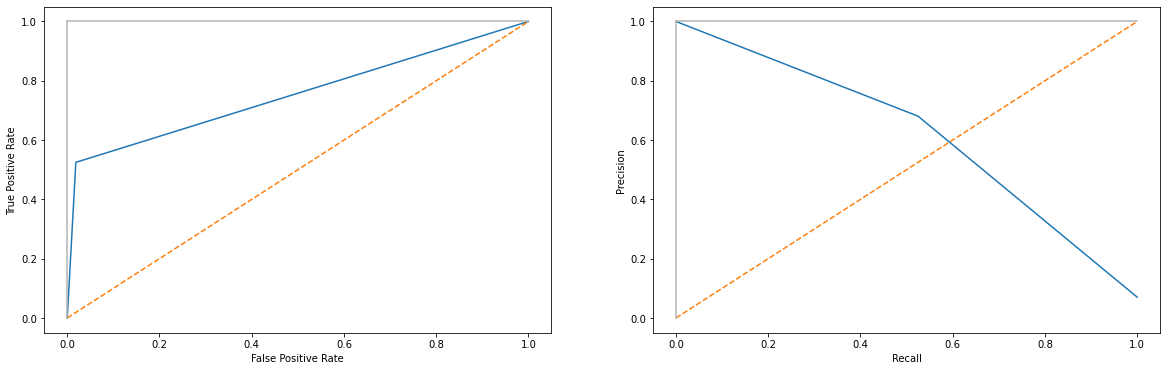

In [24]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.


## **Random Forest with RandomizedSearchCV**


Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [25]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [26]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [3, 5, 7, 11],
                                        'min_samples_split': [2, 4, 7, 9],
                                        'n_estimators': [12, 90, 100, 300,
                                                         700]})

In [27]:
y_pred_test1 = random_search.predict(X_test)


## **Random Forest with RandomSearchCV Model Evaluation**

### Checking Accuracy

In [28]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.9508311461067367


### Checking Precision Score

In [29]:
precision_score(y_test,y_pred_test1)

0.6908517350157729

### Checking Recall Score

In [30]:
recall_score(y_test,y_pred_test1)

0.5447761194029851

### Checking F1-Score


In [31]:
f1_score(y_test,y_pred_test1)

0.6091794158553547

### Checking ROC-AUC Curve and Precision-Recall Curve

Text(0.5, 0, 'Recall')

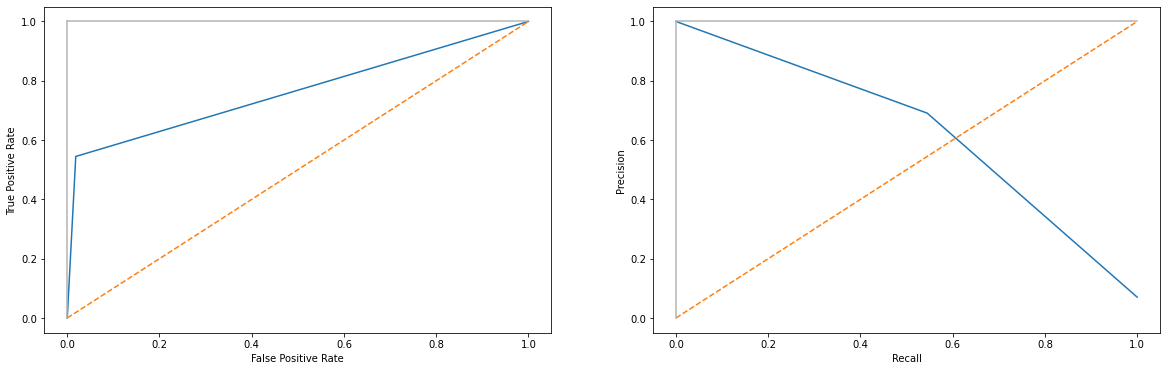

In [32]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

---
# **Choosing Better Model Based On Prediction**
---

In [33]:
precision_dict = {'Baseline Model':precision_score(y_test, y_pred_test),
                  'Tuned Model':precision_score(y_test, y_pred_test1)}

In [34]:
precision = pd.DataFrame(precision_dict, index=['Scores'])

In [35]:
precision

,Baseline Model,Tuned Model
Scores,0.68065,0.69085


- We have **compared the performance** of the two models using **various model evaluation techinques**.

- Our **objective is to minimize False Positive** so that no innocent is convicted as guilty. Therefore, **among recall & precision scores, we will give more importance to precision score**.
  
  - **Precision score for model1 is: 0.67**

  - **Precision score for model2 is: 0.69**

* As **precision score of Tuned Model is greater** than that of Baseline Model, therefore, **Tuned Model** is preferable.

---
# **Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** the criminal.